# PyCity Schools Analysis

## Summary:

This analysis is for a city's school district to help the leadership make strategic decisions regarding future school budgets and priorities. Thus we will start by analyzing the district-wide standardized test results, and then we will aggregate the data to showcase obvious trends in school performance using available information on the school.

   1. District Summary: Performing the necessary calculations and creating an overview of the district's key metrics:
    
        - Total number of schools

        - Total students

        - Total budget

        - Average test scores (Math and Reading)

        - Passing rates (Math, Reading and both)

     All this information will be used for a subsequent deeper analysis.   

   2. School Summary: Performing the necessary calculations and summarizing key metrics about each school:
        
        - Total student count per school

        - Total school budget and per capita spending per school

        - Average test scores per school (Math and Reading)

        - Passing rates (Math, Reading and both)

        - Associate all this information with the name and the type of each school    
        
   3. Sorting the information to organize and analyze data in a more efficient and meaningful way:

       - Sort the schools by the percentage of overall passing to analyze the Highest-Performing Schools and the Lowest-Performing Schools 

   4. Placing values into groups to enable more vigorous dataset customization:

        - Scores by Grade: for students of each grade level (9th, 10th, 11th, 12th) at each school
        
        - Scores by School Spending: average spending ranges (per student)
        
        - Scores by School Size:  school performance based on school size (small, medium, or large)
        
        - Scores by School Type: school performance based on the type of the school

## Conclusions:

   ### District vs. Charter
  
   
   - District schools are large schools. Without exception, each has more than 2,000 students.

   - Charter schools (except Wilson High School) are small and medium schools. Each of the small schools has fewer than 1,000 students, and each of the medium schools has 1,000 - 2,000 students.

   - Almost all District schools receive a higher budget than charter schools.
   

    
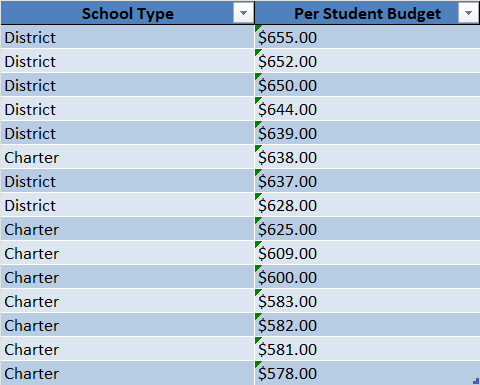


--> The ratio Per Student Budget is not proportional.

   - The percentage of Overall passing for charter schools is clearly higher than that for district schools.
    <img src='graph1.png' style ='width:500px;height:500px'/>
    
   
   - The top five highest-performing schools are charter schools.
    
   - The bottom five lowest-performing schools are district schools.
    

   
    
    
#### Conclusion:  District schools receive more funding per student than do charter schools. Therefore, the district leadership is allocating more of the total available budget to lower-performing schools.



### Math vs. Reading

   - The avarege per school Reading score is higher than the average per school Math score.
    
   - The number of students per school with reading scores higher than 70 is greater than the number of students per school with Math scores higher than 70.
    
   - The average of Reading Scores by Grade is much higher than the average of Math Scores by Grade (for nearly grades).
    
   - The Spending Reading Scores are higher than the Spending Math Scores and thus Spending Passing Reading is higher than Spending Passing Math.
   
   <img src='graph2.png' style ='width:500px;height:500px'/>
    
#### Conclusion:  The district leadership is spending more on Reading than on Math, which appears to be negatively impacting Math scores.  


## Remediation: 

Balance spending priorities to ensure equal allocation of funding.




    

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [2]:
# Calculate the total number of unique schools
school_count = len(school_data)
school_count

15

In [3]:
# Calculate the total number of students
student_count = len(student_data)
student_count

39170

In [4]:
# Calculate the total budget
total_budget = school_data['budget'].sum()
total_budget

24649428

In [5]:
# Calculate the average math score
average_math_score = student_data['math_score'].mean()
average_math_score

78.98537145774827

In [6]:
# Calculate the average reading score
average_reading_score = student_data['reading_score'].mean()
average_reading_score

81.87784018381414

In [7]:
# Calculate the percentage of students who passed math
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage

74.9808526933878

In [8]:
# Calculate the percentage of students who passed reading 
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage

85.80546336482001

In [9]:
# Calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate

65.17232575950983

In [10]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
 
district_summary = pd.DataFrame({'Total Schools': [school_count],
                                 'Total Students':[student_count],
                                 'Total Budget':[total_budget],
                                 'Average Math Score':[average_math_score],
                                 'Average Reading Score':[average_reading_score],
                                 '% Passing Math':[passing_math_percentage],
                                 '% Passing Reading':[passing_reading_percentage],
                                 'Overall Passing':[overall_passing_rate]
                                })
 
# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)

# Display the DataFrame
district_summary

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,Overall Passing
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary 

In [11]:
# Select all of the school types
school_types = pd.DataFrame({'School Type':school_data['type'].unique()})
school_types

,School Type
0,District
1,Charter


In [12]:
# Calculate the total student count per school

per_school_counts =pd.DataFrame({'Total Students':school_data_complete.groupby(['school_name'])['Student ID'].count()})
per_school_counts

,Total Students
school_name,
Bailey High School,4976
Cabrera High School,1858
Figueroa High School,2949
Ford High School,2739
Griffin High School,1468
Hernandez High School,4635
Holden High School,427
Huang High School,2917
Johnson High School,4761


In [13]:
# Calculate the total school budget and per capita spending per school

per_school_budget= school_data.set_index('school_name')
per_school_budget =pd.DataFrame ({'per school budget' :per_school_budget['budget']})
per_school_capita=pd.DataFrame({'per school capita':per_school_budget['per school budget']/per_school_counts['Total Students']})
school_budget_capita = pd.DataFrame({'per school budget':per_school_budget['per school budget'],
                                     'per school capita':per_school_capita ['per school capita']})



In [14]:
# Calculate the average test scores per school
grouped_school=school_data_complete.groupby('school_name')

per_school_math =pd.DataFrame({'avarege per school math': grouped_school['math_score'].mean()})

per_school_reading=pd.DataFrame({'avarege per school reading': grouped_school['reading_score'].mean()})

school_math_reading = pd.DataFrame({'avarege per school math': per_school_math['avarege per school math'],
                                    'avarege per school reading':per_school_reading['avarege per school reading']})
school_math_reading


,avarege per school math,avarege per school reading
school_name,,
Bailey High School,77.048432,81.033963
Cabrera High School,83.061895,83.975780
Figueroa High School,76.711767,81.158020
Ford High School,77.102592,80.746258
Griffin High School,83.351499,83.816757
Hernandez High School,77.289752,80.934412
Holden High School,83.803279,83.814988
Huang High School,76.629414,81.182722
Johnson High School,77.072464,80.966394


In [15]:
# Calculate the number of students per school with math scores of 70 or higher
students_passing_math = school_data_complete[(school_data_complete["math_score"] >= 70)]

school_students_passing_math =pd.DataFrame ({'math scores of 70 or higher':students_passing_math.groupby('school_name')['math_score'].count()})
                                                                                         

In [16]:
# Calculate the number of students per school with reading scores of 70 or higher

students_passing_reading = school_data_complete[(school_data_complete["reading_score"] >= 70)]

school_students_passing_reading =pd.DataFrame ({'reading scores of 70 or higher':students_passing_reading.groupby('school_name')['reading_score'].size()})
school_students_passing_reading                                                                                         

,reading scores of 70 or higher
school_name,
Bailey High School,4077
Cabrera High School,1803
Figueroa High School,2381
Ford High School,2172
Griffin High School,1426
Hernandez High School,3748
Holden High School,411
Huang High School,2372
Johnson High School,3867


In [17]:
# Calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[(school_data_complete["reading_score"] >= 70) & 
                                                         (school_data_complete["math_score"] >= 70)]

school_students_passing_math_and_reading =pd.DataFrame({'students passing math and reading' :students_passing_math_and_reading.groupby(["school_name"]).size()})


In [18]:
# Calculate the passing rates
per_school_passing_math = pd.DataFrame({'per school passing math': school_students_passing_math['math scores of 70 or higher'] / per_school_counts['Total Students']*100})

per_school_passing_reading = pd.DataFrame({'per school passing reading':school_students_passing_reading['reading scores of 70 or higher'] / per_school_counts['Total Students'] * 100})

overall_passing_rate = pd.DataFrame({'per school passing math and reading':school_students_passing_math_and_reading['students passing math and reading'] / per_school_counts['Total Students'] * 100})



In [38]:
# Create a DataFrame with columns for the calculations above.

per_school_summary= school_data.set_index('school_name')

per_school_summary = pd.DataFrame({'School Type':per_school_summary['type'],
                                   'Total Students':per_school_counts['Total Students'],
                                   'Total School Budget':per_school_budget['per school budget'],
                                   'Per Student Budget':per_school_capita['per school capita'],
                                   'Average Math Score': per_school_math['avarege per school math'],
                                   'Average Reading Score': per_school_reading['avarege per school reading'],
                                   '% Passing Math':per_school_passing_math['per school passing math'],
                                   '% Passing Reading':per_school_passing_reading['per school passing reading'],
                                   '% Overall Passing':overall_passing_rate['per school passing math and reading']
                                  })


#Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)
per_school_summary=per_school_summary.rename_axis(None)
# Display the DataFrame
per_school_summary

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Highest-Performing Schools (by % Overall Passing')

In [39]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values('% Overall Passing',ascending=False)

top_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [40]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values('% Overall Passing',ascending=True)
top_schools["Total students"] = top_schools["Total Students"].map("${:,.0f}".format)
bottom_schools.head(5)

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172


## Math Scores by Grade

In [52]:
# Separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.

ninth_grade_math_scores =  pd.DataFrame({'9th':ninth_graders.groupby('school_name')['math_score'].mean()})

tenth_grade_math_scores =  pd.DataFrame({'10th':tenth_graders.groupby('school_name')['math_score'].mean()})

eleventh_grade_math_scores = pd.DataFrame({'11th':eleventh_graders.groupby('school_name')['math_score'].mean()})

twelfth_grade_math_scores = pd.DataFrame({'12th':twelfth_graders.groupby('school_name')['math_score'].mean()})

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
math_scores_by_grade = pd.DataFrame({'9th':ninth_grade_math_scores['9th'],
                                     '10th':tenth_grade_math_scores['10th'],
                                     '11th':eleventh_grade_math_scores['11th'],
                                     '12th':twelfth_grade_math_scores['12th'],
                                    })

#Minor data wrangling
math_scores_by_grade.index.name = None

#Display the DataFrame
math_scores_by_grade

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade

In [51]:
# Separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `math_score` column for each.

ninth_grade_reading_scores =  pd.DataFrame({'9th':ninth_graders.groupby('school_name')['reading_score'].mean()})

tenth_grade_reading_scores =  pd.DataFrame({'10th':tenth_graders.groupby('school_name')['reading_score'].mean()})

eleventh_grade_reading_scores = pd.DataFrame({'11th':eleventh_graders.groupby('school_name')['reading_score'].mean()})

twelfth_grade_reading_scores = pd.DataFrame({'12th':twelfth_graders.groupby('school_name')['reading_score'].mean()})

# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({'9th':ninth_grade_reading_scores['9th'],
                                     '10th':tenth_grade_reading_scores['10th'],
                                     '11th':eleventh_grade_reading_scores['11th'],
                                     '12th':twelfth_grade_reading_scores['12th'],
                                    })

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
reading_scores_by_grade

,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


# Scores by School Spending

In [44]:
# Establish the bins 
spending_bins = [0, 585, 630, 645, 680]
la = ["<$585", "$585-630", "$630-645", "$645-680"]

In [45]:
# Create a copy of the school summary 
school_spending_df = per_school_summary.copy()

In [46]:
# Categorize spending based on the bins.

school_spending_df['Per Student Budget']=school_budget_capita['per school capita']

school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df['Per Student Budget'],
                                                    spending_bins, labels=la,include_lowest = True)
school_spending_df["Per Student Budget"] = school_spending_df["Per Student Budget"].map("${:,.2f}".format)

school_spending_df

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,Spending Ranges (Per Student)
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,$645-680
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,$585-630


In [27]:
#  Calculate averages for the desired columns. 
spending_math_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Math Score"].mean()
spending_reading_scores = school_spending_df.groupby(["Spending Ranges (Per Student)"])["Average Reading Score"].mean()
spending_passing_math = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Math"].mean()
spending_passing_reading = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Passing Reading"].mean()
overall_passing_spending = school_spending_df.groupby(["Spending Ranges (Per Student)"])["% Overall Passing"].mean()

In [28]:
# Assemble into DataFrame
spending_summary = pd.DataFrame({'Spending Math Scores':spending_math_scores,
                                'Spending Reading Scores':spending_reading_scores,
                                'Spending Passing Math':spending_passing_math,
                                'Spending Passing Reading':spending_passing_reading,
                                'Overall Passing Spending':overall_passing_spending
                                })

# Display results
spending_summary

,Spending Math Scores,Spending Reading Scores,Spending Passing Math,Spending Passing Reading,Overall Passing Spending
Spending Ranges (Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,90.369459
$585-630,81.899826,83.155286,87.133538,92.718205,81.418596
$630-645,78.518855,81.624473,73.484209,84.391793,62.857656
$645-680,76.997210,81.027843,66.164813,81.133951,53.526855


## Scores by School Size

In [47]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [48]:
# Categorize the spending based on the bins

per_school_summary["School Size"] = per_school_summary['Total Students']
per_school_summary["School Size"] = pd.cut(per_school_summary['Total Students'],
                                                 size_bins, labels=labels,include_lowest = True)
per_school_summary


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing,School Size
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,54.642283,Large (2000-5000)
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,91.334769,Medium (1000-2000)
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,53.204476,Large (2000-5000)
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,54.289887,Large (2000-5000)
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,90.599455,Medium (1000-2000)
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,53.527508,Large (2000-5000)
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,89.227166,Small (<1000)
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,53.513884,Large (2000-5000)
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,53.539172,Large (2000-5000)
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,90.540541,Small (<1000)


In [31]:
# Calculate averages for the desired columns. 
size_math_scores = (per_school_summary.groupby(["School Size"])["Average Math Score"].mean())
size_reading_scores =(per_school_summary.groupby(["School Size"])["Average Reading Score"].mean())
size_passing_math = (per_school_summary.groupby(["School Size"])["% Passing Math"].mean())
size_passing_reading =  (per_school_summary.groupby(["School Size"])["% Passing Reading"].mean())
size_overall_passing =  (per_school_summary.groupby(["School Size"])["% Overall Passing"].mean())

In [49]:

# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).


size_summary=pd.DataFrame({
                        'Average Math Scores':size_math_scores,
                        'Average Reading Scores':size_reading_scores,
                        '% Passing Math':size_passing_math,
                        '% Passing Reading': size_passing_reading,
                        '% Overall Passing':size_overall_passing
                        
                          })                                                      
                                
                            
# Display results
size_summary

,Average Math Scores,Average Reading Scores,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,89.883853
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,90.621535
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,58.286003


## Scores by School Type

In [33]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"])["% Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"])["% Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"])["% Overall Passing"].mean()

In [50]:
# Assemble the new data by type into a DataFrame
type_summary = type_summary=pd.DataFrame({
                        'Average Math Scores ':average_math_score_by_type,
                        'Average Reading Scores':average_reading_score_by_type,
                        '% Passing Math':average_percent_passing_math_by_type,
                        '% Passing Reading':average_percent_passing_reading_by_type,
                        '% Overall Passing':average_percent_overall_passing_by_type
                        
                          })
                           
 
# Display results
type_summary

,Average Math Scores,Average Reading Scores,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.473852,83.896421,93.620830,96.586489,90.432244
District,76.956733,80.966636,66.548453,80.799062,53.672208


In [35]:
#Export some dataset to excel to insert charts and analyse
with pd.ExcelWriter('panda.xlsx')as writer:
    type_summary.to_excel(writer,sheet_name='Sheet_1')
    spending_summary.to_excel(writer,sheet_name='Sheet_2')
    per_school_summary.to_excel(writer,sheet_name='Sheet_3')